In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# https://www.kaggle.com/anirbansen3027/m5-forecasting-eda-beginner
# 沃尔玛销售情况分析
import os

pre_path = "./m5-forecasting-accuracy"
for dirname,_,filenames in os.walk(pre_path):
    for filename in filenames:
        print(os.path.join(dirname,filename))

./m5-forecasting-accuracy\calendar.csv
./m5-forecasting-accuracy\sales_train_validation.csv
./m5-forecasting-accuracy\sample_submission.csv
./m5-forecasting-accuracy\sell_prices.csv


In [3]:
sales_data = pd.read_csv(pre_path+"/sales_train_validation.csv")
price_data = pd.read_csv(pre_path+"/sell_prices.csv")
calender_data = pd.read_csv(pre_path+"/calendar.csv")
submission_data = pd.read_csv(pre_path+"/sample_submission.csv")

In [4]:
print("the sales data has '{}' rows and '{}' columns".format(sales_data.shape[0],
                                                            sales_data.shape[1]))

the sales data has '30490' rows and '1919' columns


In [5]:
# lets have a look at the data
sales_data.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,3,0,1,1,1,3,0,1,1
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,2,1,1,1,0,1,1,1
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,0,5,4,1,0,1,3,7,2
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,1,0,1,1,2,2,2,4


In [6]:
# 查看专卖店数量
len(sales_data['store_id'].unique())

10

In [7]:
# 查看售卖的产品名称数量
len(sales_data['item_id'].unique())

3049

In [8]:
# 查看产品类别数量
len(sales_data['cat_id'].unique())

3

In [9]:
# 查看州的数量 U.S. (California, Texas and Wisconsin)
print(sales_data['state_id'].unique())

['CA' 'TX' 'WI']


In [10]:
# 查看每个州的销售情况
sales_data.groupby('state_id').size()

state_id
CA    12196
TX     9147
WI     9147
dtype: int64

In [11]:
# 查看销售比例
sales_data.groupby('state_id').size()/len(sales_data)

state_id
CA    0.4
TX    0.3
WI    0.3
dtype: float64

In [12]:
#Let's make a list of date columns date_col = [d1,d2,d3,d4...]
date_col = [col for col in sales_data if col.startswith('d_')]

In [13]:
pd.pivot_table(sales_data,values=date_col,index='state_id',
               aggfunc='sum').sum(axis=1)

state_id
CA    28675547
TX    18899006
WI    18120856
dtype: int64

In [14]:
#Calculating the sales ratio
sales_data['total_sales'] = sales_data[date_col].sum(axis=1)
state_wise_sales_data = sales_data.groupby('state_id').agg(
    {"total_sales":"sum"})/sales_data.total_sales.sum() * 100
state_wise_sales_data = state_wise_sales_data.reset_index()

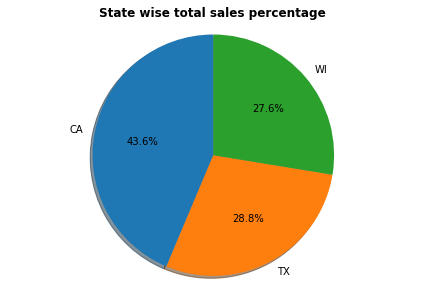

In [15]:
# plotting the sales ratio
fig,ax1 = plt.subplots()
ax1.pie(state_wise_sales_data['total_sales'],
        labels= state_wise_sales_data['state_id'] , 
        autopct='%1.1f%%',
        shadow=True, 
        startangle=90)# Equal aspect ratio ensures that pies is drawn as a cicle

ax1.axis('equal')
plt.tight_layout()
plt.title("State wise total sales percentage",fontweight="bold")
plt.show()

### 绘制10家商店的销售占比

In [16]:
# caculating the sales ratio for the 10 stores
store_wise_sales_data = sales_data.groupby('store_id').agg(
    {"total_sales":"sum"})/sales_data['total_sales'].sum() * 100

In [17]:
# plotting the sales ratio for the 10 stores
store_wise_sales_data = store_wise_sales_data.reset_index()

In [18]:
store_wise_sales_data.head(10)

,store_id,total_sales
0,CA_1,11.718043
1,CA_2,8.654296
2,CA_3,17.030383
3,CA_4,6.246519
4,TX_1,8.517021
5,TX_2,10.981565
6,TX_3,9.269034
7,WI_1,7.837781
8,WI_2,9.961141
9,WI_3,9.784218


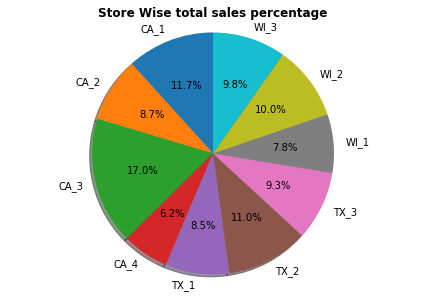

In [19]:
fig1,ax1 = plt.subplots()
ax1.pie(store_wise_sales_data['total_sales'],
        labels=store_wise_sales_data['store_id'],
       autopct='%1.1f%%', # 指定格式
       shadow=True,
       startangle=90) # equal aspect ratio ensures that pie is drawn as a circle
ax1.axis("equal")
plt.tight_layout()
plt.title("Store Wise total sales percentage",fontweight='bold')
plt.show()

In [20]:
# 计算CA_3在CA中的销售额占比
ca3Sales = store_wise_sales_data[store_wise_sales_data['store_id']=='CA_3']['total_sales']
sumCA = store_wise_sales_data.loc[store_wise_sales_data['store_id'].apply(lambda x:str(x).find('CA')>=0),'total_sales'].sum()
ca3Sales/sumCA * 100

2    39.016448
Name: total_sales, dtype: float64

In [21]:
# 绘制3种类别的销售比率
# caculating the sales ratio for the 3 categories

cat_wise_sales_data = sales_data.groupby('cat_id').agg(
    {"total_sales":"sum"})/sales_data.total_sales.sum() * 100
cat_wise_sales_data = cat_wise_sales_data.reset_index()

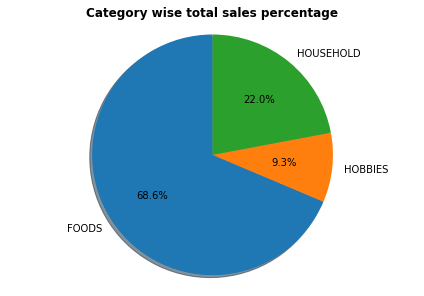

In [22]:
# plotting the sales ratio for the 3 categories
fig1,ax1 = plt.subplots()
ax1.pie(cat_wise_sales_data['total_sales'],
        labels= cat_wise_sales_data['cat_id'] , 
        autopct='%1.1f%%',
        shadow=True, 
        startangle=90)# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')
plt.tight_layout()
plt.title("Category wise total sales percentage",fontweight='bold')
plt.show()

70%的销售额来源于食物，20%来自于家庭，10%来自业余爱好。

## 统计每一个州的产品销售额

In [23]:
#利用透视图来做吧。
temp = pd.pivot_table(sales_data,values=['total_sales'],index='state_id',
               columns='cat_id',aggfunc='sum')
temp/temp.sum()

total_sales                    
cat_id         FOODS   HOBBIES HOUSEHOLD
state_id                                
CA          0.425734  0.496324  0.444687
TX          0.287346  0.259982  0.300417
WI          0.286920  0.243694  0.254896

In [24]:
cat_state_sales = sales_data.groupby(['cat_id','state_id']).agg(
    {"total_sales":"sum"}).groupby(level=0).apply(
    lambda x:100 * x /float(x.sum())).unstack()

In [25]:
cat_state_sales.columns

MultiIndex([('total_sales', 'CA'),
            ('total_sales', 'TX'),
            ('total_sales', 'WI')],
           names=[None, 'state_id'])

In [26]:
cat_state_sales.columns = [f'{i}_{j}' if j != '' else f'{i}' for i,j in cat_state_sales.columns]

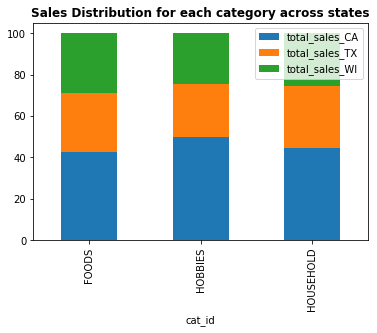

In [27]:
cat_state_sales.plot(kind='bar',stacked=True)
plt.title("Sales Distribution for each category across states",
          fontweight='bold')
plt.show()

具体销售量占比如图：
        cat_id	FOODS	HOBBIES	   HOUSEHOLD
        
state_id			

CA	          0.425734	0.496324	0.444687

TX	          0.287346	0.259982	0.300417

WI	          0.286920	0.243694	0.254896

+ California在FOODS和HOUSEHOLD方面贡献了40%的销售量，而HOBBIES销售量的贡献度达到了50%。
+ Winscoin在HOBBIES和HOUSEHOLD方面贡献了25%的销售量，FOODS销售量的贡献度接近29%。
+ Texas在食品和家庭用品销售额站到了近30%，而业余爱好用品销售额占到了25%。

## 州产品类别销售情况

Text(0.5, 1.0, 'Sales Distrubution for each state across categories')

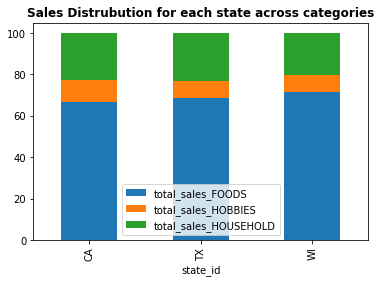

In [28]:
#Calculating sales distribution for each state 
state_cat_sales = sales_data.groupby(['state_id','cat_id']).agg(
    {"total_sales":"sum"}).groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).unstack()
#Plotting the sales distribution for each state
state_cat_sales.columns = [f'{i}_{j}' if j != '' else f'{i}' for i,j in state_cat_sales.columns]
state_cat_sales.plot(kind='bar', stacked=True)
plt.title("Sales Distrubution for each state across categories",fontweight = "bold")

In [29]:
#利用透视图来做吧。
# for idx in temp.index:
#     print(temp[temp.index==idx]/temp[temp.index==idx].sum(axis=1).values[0])
temp = pd.pivot_table(sales_data,values=['total_sales'],index='cat_id',
               columns='state_id',aggfunc='sum')
temp/temp.sum()

total_sales                    
state_id           CA        TX        WI
cat_id                                   
FOODS        0.669431  0.685561  0.713941
HOBBIES      0.106010  0.084255  0.082368
HOUSEHOLD    0.224559  0.230184  0.203691

+ Winscoin在FOODS上花费最高72%，在HOBBIES上花费8%，在HOUSEHOLD中花费20%。
+ California花费67%在FOODS上，HOBBIES所有花费是所有州最高的，为11%，22%在HOUSEHOLD上。
+ Texas花费68%在FOODS上，8%在HOBBIES上，HOUSEHOLD在所有州中花费为23%。

In [30]:
# 查看departments的取值
sales_data.dept_id.unique()

array(['HOBBIES_1', 'HOBBIES_2', 'HOUSEHOLD_1', 'HOUSEHOLD_2', 'FOODS_1',
       'FOODS_2', 'FOODS_3'], dtype=object)

we have 7 departments in total(2 hobbies,2 household and 3 food departments)

### 绘制跨部门的销售分布

In [31]:
# 计算跨部门的销售分布
dept_sales = sales_data.groupby('dept_id').agg({"total_sales":"sum"})/sales_data.total_sales.sum()*100
# plotting 
dept_sales = dept_sales.reset_index()

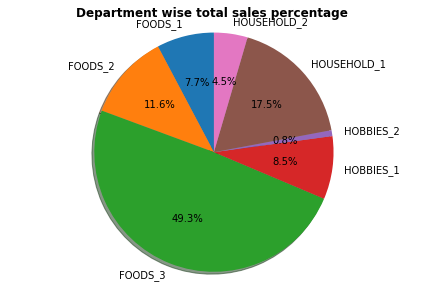

In [32]:
fig1,ax1 = plt.subplots()
ax1.pie(dept_sales['total_sales'],
        labels = dept_sales['dept_id'],
        autopct='%1.1f%%',
        shadow=True,startangle=90)# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')
plt.tight_layout()
plt.title("Department wise total sales percentage",fontweight="bold")
plt.show()

+ 将近50%的销售额来自FOODS-3 department，这是最高的(在销售额中约70%来自FOODS)
+ 在家庭中，household_1占sales总数的17.5%(22%的销售额来自sales)
+ 9.3%的销售额来自hobbies，8.5%来自hobbies_1

In [33]:
dept_sales

foods3Sales = dept_sales[dept_sales['dept_id']=='FOODS_3']['total_sales']
sumFOOD = dept_sales.loc[dept_sales['dept_id'].apply(lambda x:str(x).find('FOODS')>=0),'total_sales'].sum()
foods3Sales/sumFOOD * 100

2    71.794455
Name: total_sales, dtype: float64

### 绘制跨部门门店的产品销售图

In [34]:
# 计算门店的销售分布
store_dept_sales = sales_data.groupby(['store_id','dept_id']).agg(
    {"total_sales":"sum"})

In [35]:
store_dept_sales

total_sales
store_id dept_id                 
CA_1     FOODS_1           567849
         FOODS_2           885144
         FOODS_3          3927835
         HOBBIES_1         821524
         HOBBIES_2          55154
...                           ...
WI_3     FOODS_3          3520357
         HOBBIES_1         426000
         HOBBIES_2          40668
         HOUSEHOLD_1      1017626
         HOUSEHOLD_2       212808

[70 rows x 1 columns]

In [36]:
store_dept_sales.apply(lambda x:100*x/float(x.sum())).head(10)

total_sales
store_id dept_id                 
CA_1     FOODS_1         0.864366
         FOODS_2         1.347345
         FOODS_3         5.978858
         HOBBIES_1       1.250504
         HOBBIES_2       0.083954
         HOUSEHOLD_1     1.674645
         HOUSEHOLD_2     0.518370
CA_2     FOODS_1         1.092446
         FOODS_2         0.506457
         FOODS_3         3.698665

In [37]:
# ?pd.core.frame.DataFrame.unstack
# 关于stack和unstack的理解，可查看：https://www.cnblogs.com/bambipai/p/7658311.html
store_dept_sales = store_dept_sales.groupby(level=0).apply(
    lambda x:100*x/float(x.sum())).unstack()

In [38]:
store_dept_sales

total_sales                                                         \
dept_id      FOODS_1    FOODS_2    FOODS_3  HOBBIES_1 HOBBIES_2 HOUSEHOLD_1   
store_id                                                                      
CA_1        7.376371  11.498041  51.022666  10.671615  0.716452   14.291168   
CA_2       12.623167   5.852088  42.737907  10.171235  1.046878   19.468066   
CA_3        6.586076  10.748540  49.841547   7.914764  0.674185   19.190548   
CA_4        8.371275  13.093504  47.240084  13.204210  0.550653   12.937790   
TX_1        6.535066  11.286507  49.703215   6.899086  0.769576   20.478574   
TX_2        7.048641  10.831999  51.634984   7.771571  1.044109   17.384977   
TX_3        6.757065  12.385139  49.224726   7.553655  1.105064   19.053607   
WI_1        9.840666  11.668028  45.267585  11.810365  0.923916   15.981066   
WI_2        8.113585  16.696776  48.052953   5.019734  0.637560   18.562283   
WI_3        6.204706  12.624853  54.767834   6.627481  0.632691   15.831682   

                      
dept_id  HOUSEHOLD_2  
store_id              
CA_1        4.423687  
CA_2        8.100660  
CA_3        5.044341  
CA_4        4.602483  
TX_1        4.327978  
TX_2        4.283720  
TX_3        3.920743  
WI_1        4.508375  
WI_2        2.917110  
WI_3        3.310753

In [39]:
# 将total_sales键和FOODS_n系列的键组合成一个键
store_dept_sales.columns = [f'{i}_{j}' if j != '' else f'{i}' for i,j in store_dept_sales.columns]

In [40]:
store_dept_sales.columns

Index(['total_sales_FOODS_1', 'total_sales_FOODS_2', 'total_sales_FOODS_3',
       'total_sales_HOBBIES_1', 'total_sales_HOBBIES_2',
       'total_sales_HOUSEHOLD_1', 'total_sales_HOUSEHOLD_2'],
      dtype='object')

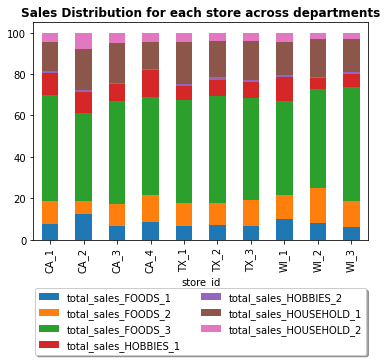

In [41]:
# 各产品占比分布
store_dept_sales.plot(kind='bar',stacked=True)
plt.title("Sales Distribution for each store across departments",fontweight='bold')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), shadow=True, ncol=2)

+ WI-3销售最不均衡，54%的销售来自FOODS-3,7%的销售来自HOBBIES。
+ CA-2销售最为均衡，与其它商店相比，FOODS-3销售量最低，而FOODS-1和HOUSE-HOLD2销售量最高。
+ 对于所有商店而言，FOODS-3、HOBBIES1和HOUSEHOLD-1销售占比最高

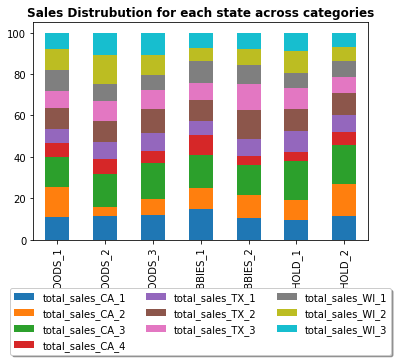

In [42]:
dept_store_sales = sales_data.groupby(['dept_id','store_id']).agg(
    {"total_sales":"sum"}).groupby(level=0).apply(
    lambda x: 100 * x / float(x.sum())).unstack()
dept_store_sales.columns = [f'{i}_{j}' if j != '' else f'{i}' for i,j in dept_store_sales.columns]
dept_store_sales.plot(kind='bar', stacked=True)
plt.title("Sales Distrubution for each state across categories",fontweight = "bold")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), shadow=True, ncol=3)

## Price Data

In [43]:
price_data.head()

,store_id,item_id,wm_yr_wk,sell_price
0,CA_1,HOBBIES_1_001,11325,9.58
1,CA_1,HOBBIES_1_001,11326,9.58
2,CA_1,HOBBIES_1_001,11327,8.26
3,CA_1,HOBBIES_1_001,11328,8.26
4,CA_1,HOBBIES_1_001,11329,8.26


In [44]:
# 查看商品的在1913天内的最高最低价格、价格变动，及所属类别
item_store_prices = price_data.groupby(['item_id','store_id']).agg({
    "sell_price":["max","min"]
})

In [45]:
item_store_prices

sell_price      
                                max   min
item_id         store_id                 
FOODS_1_001     CA_1           2.24  2.00
                CA_2           2.24  2.00
                CA_3           2.24  1.75
                CA_4           2.24  2.00
                TX_1           2.24  0.99
...                             ...   ...
HOUSEHOLD_2_516 TX_2           5.94  3.00
                TX_3           5.94  0.99
                WI_1           5.94  5.94
                WI_2           5.94  5.94
                WI_3           5.94  5.94

[30490 rows x 2 columns]

In [46]:
item_store_prices.columns

MultiIndex([('sell_price', 'max'),
            ('sell_price', 'min')],
           )

In [47]:
item_store_prices.columns = [f'{i}_{j}' for i,j in item_store_prices.columns]

In [48]:
item_store_prices.columns

Index(['sell_price_max', 'sell_price_min'], dtype='object')

In [49]:
item_store_prices['price_change'] = item_store_prices['sell_price_max'] - item_store_prices['sell_price_min']

In [50]:
item_store_prices = item_store_prices.sort_values(['price_change','item_id'],ascending=False).reset_index()

In [51]:
item_store_prices['category'] = item_store_prices['item_id'].str.split("_",expand=True)[0]

In [52]:
item_store_prices.head()

,item_id,store_id,sell_price_max,sell_price_min,price_change,category
0,HOUSEHOLD_2_406,WI_3,107.32,3.26,104.06,HOUSEHOLD
1,HOUSEHOLD_2_406,WI_2,61.46,12.46,49.00,HOUSEHOLD
2,HOUSEHOLD_2_466,TX_1,52.62,6.46,46.16,HOUSEHOLD
3,HOUSEHOLD_2_178,TX_1,44.36,3.00,41.36,HOUSEHOLD
4,HOUSEHOLD_2_250,WI_2,34.18,3.36,30.82,HOUSEHOLD


- HOUSEHOLD产品价格变动最为明显，尤其是HOUSEHOLD_2产品在WI州中变化最大。
- WI_3商店的HOUSEHOLD_2_406价格变化最大，从最低价格的3.26美元上涨了32倍，达到了107美元。

In [53]:
item_store_prices.tail(10)

,item_id,store_id,sell_price_max,sell_price_min,price_change,category
30480,FOODS_1_014,CA_1,0.98,0.98,0.0,FOODS
30481,FOODS_1_014,CA_2,0.98,0.98,0.0,FOODS
30482,FOODS_1_014,CA_3,0.98,0.98,0.0,FOODS
30483,FOODS_1_014,CA_4,0.98,0.98,0.0,FOODS
30484,FOODS_1_014,TX_1,0.98,0.98,0.0,FOODS
30485,FOODS_1_014,TX_2,0.98,0.98,0.0,FOODS
30486,FOODS_1_014,TX_3,0.98,0.98,0.0,FOODS
30487,FOODS_1_014,WI_1,0.98,0.98,0.0,FOODS
30488,FOODS_1_014,WI_2,0.98,0.98,0.0,FOODS
30489,FOODS_1_014,WI_3,0.98,0.98,0.0,FOODS


- 产品FOODS_1_014的价格在若干年未发生变动

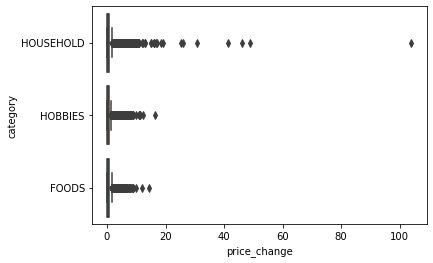

In [54]:
import seaborn as sns
# 通过箱图查看产品价格波动情况
sns.boxplot(x="price_change",y="category",data=item_store_prices)

可以得知信息：
- 大多数产品价格并未发生改变，大多数产品价格波动范围在10-15美元
- 其中HOUSEHOLD的产品的价格波动最为明显

## 1.3 Calender

In [55]:
calender_data.head()

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0
1,2011-01-30,11101,Sunday,2,1,2011,d_2,NaN,NaN,NaN,NaN,0,0,0
2,2011-01-31,11101,Monday,3,1,2011,d_3,NaN,NaN,NaN,NaN,0,0,0
3,2011-02-01,11101,Tuesday,4,2,2011,d_4,NaN,NaN,NaN,NaN,1,1,0
4,2011-02-02,11101,Wednesday,5,2,2011,d_5,NaN,NaN,NaN,NaN,1,0,1


In [56]:
print("The calender dataset has {} rows and {} columns".format(calender_data.shape[0],
                                                                  calender_data.shape[1]))

The calender dataset has 1969 rows and 14 columns


- 根据前面的calendar data可知，我们是有1913天的销售数据，而这里显示了有1969天的销售数据。
- 我们一天最多有两个事件，事件名称和事件类型都是给定的
- 我们还分别为每个州SNAP天数进行标记区分，注意所有的州SNAP天数是不同的。

关于SNAP了解可查看该文章：https://www.feedingamerica.org/take-action/advocate/federal-hunger-relief-programs/snap

SNSAP是美国的贫穷帮扶机构，低贫家庭可以用SNAP购买营养食物，如 breads and cereals, fruits and vegetables, meat and fish and dairy products。不能购买alcohol,tobacco products or nonfood items.

In [57]:
# event name for each event type
events1 = calender_data[['event_type_1','event_name_1',]]
events2 = calender_data[['event_type_2','event_name_2',]]
events2.columns = ["event_type_1","event_name_1"]
events = pd.concat([events1,events2],ignore_index = True)
events = events.dropna().drop_duplicates()
events.sort_values('event_type_1')

,event_type_1,event_name_1
141,Cultural,Father's day
275,Cultural,Halloween
99,Cultural,Mother's day
96,Cultural,Cinco De Mayo
47,Cultural,StPatricksDay
435,Cultural,Easter
16,Cultural,ValentinesDay
337,National,NewYear
23,National,PresidentsDay
121,National,MemorialDay


In [58]:
events.shape

(30, 2)

In [59]:
events_dict = {k: g["event_name_1"].tolist() for k,g in events.groupby("event_type_1")}
events_dict

{'Cultural': ['ValentinesDay',
  'StPatricksDay',
  'Cinco De Mayo',
  "Mother's day",
  "Father's day",
  'Halloween',
  'Easter'],
 'National': ['PresidentsDay',
  'MemorialDay',
  'IndependenceDay',
  'LaborDay',
  'ColumbusDay',
  'VeteransDay',
  'Thanksgiving',
  'Christmas',
  'NewYear',
  'MartinLutherKingDay'],
 'Religious': ['LentStart',
  'LentWeek2',
  'Purim End',
  'OrthodoxEaster',
  'Pesach End',
  'Ramadan starts',
  'Eid al-Fitr',
  'EidAlAdha',
  'Chanukah End',
  'OrthodoxChristmas'],
 'Sporting': ['SuperBowl', 'NBAFinalsStart', 'NBAFinalsEnd']}

In [60]:
print("Event List")
pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in events_dict.items()]))

Event List


,Cultural,National,Religious,Sporting
0,ValentinesDay,PresidentsDay,LentStart,SuperBowl
1,StPatricksDay,MemorialDay,LentWeek2,NBAFinalsStart
2,Cinco De Mayo,IndependenceDay,Purim End,NBAFinalsEnd
3,Mother's day,LaborDay,OrthodoxEaster,NaN
4,Father's day,ColumbusDay,Pesach End,NaN
5,Halloween,VeteransDay,Ramadan starts,NaN
6,Easter,Thanksgiving,Eid al-Fitr,NaN
7,NaN,Christmas,EidAlAdha,NaN
8,NaN,NewYear,Chanukah End,NaN
9,NaN,MartinLutherKingDay,OrthodoxChristmas,NaN


一年有10个国家和宗教活动，6个文化活动和3个体育活动，总共30个活动。

In [61]:
calender_data.columns

Index(['date', 'wm_yr_wk', 'weekday', 'wday', 'month', 'year', 'd',
       'event_name_1', 'event_type_1', 'event_name_2', 'event_type_2',
       'snap_CA', 'snap_TX', 'snap_WI'],
      dtype='object')

In [62]:
snap_days = calender_data.groupby(['year','month'])[ 'snap_CA', 'snap_TX', 'snap_WI'].sum().reset_index()

D:\Users\junode\Anaconda3\envs\py36\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [63]:
snap_days

,year,month,snap_CA,snap_TX,snap_WI
0,2011,1,0,0,0
1,2011,2,10,10,10
2,2011,3,10,10,10
3,2011,4,10,10,10
4,2011,5,10,10,10
...,...,...,...,...,...
61,2016,2,10,10,10
62,2016,3,10,10,10
63,2016,4,10,10,10
64,2016,5,10,10,10


In [64]:
print("在所有州中，每个月的SNAP天数")
snap_days.pivot_table(values=['snap_CA', 'snap_TX', 'snap_WI'],index='month',columns='year')

在所有州中，每个月的SNAP天数


snap_CA                               snap_TX                          \
year     2011  2012  2013  2014  2015  2016    2011  2012  2013  2014  2015   
month                                                                         
1         0.0  10.0  10.0  10.0  10.0  10.0     0.0  10.0  10.0  10.0  10.0   
2        10.0  10.0  10.0  10.0  10.0  10.0    10.0  10.0  10.0  10.0  10.0   
3        10.0  10.0  10.0  10.0  10.0  10.0    10.0  10.0  10.0  10.0  10.0   
4        10.0  10.0  10.0  10.0  10.0  10.0    10.0  10.0  10.0  10.0  10.0   
5        10.0  10.0  10.0  10.0  10.0  10.0    10.0  10.0  10.0  10.0  10.0   
6        10.0  10.0  10.0  10.0  10.0  10.0    10.0  10.0  10.0  10.0  10.0   
7        10.0  10.0  10.0  10.0  10.0   NaN    10.0  10.0  10.0  10.0  10.0   
8        10.0  10.0  10.0  10.0  10.0   NaN    10.0  10.0  10.0  10.0  10.0   
9        10.0  10.0  10.0  10.0  10.0   NaN    10.0  10.0  10.0  10.0  10.0   
10       10.0  10.0  10.0  10.0  10.0   NaN    10.0  10.0  10.0  10.0  10.0   
11       10.0  10.0  10.0  10.0  10.0   NaN    10.0  10.0  10.0  10.0  10.0   
12       10.0  10.0  10.0  10.0  10.0   NaN    10.0  10.0  10.0  10.0  10.0   

            snap_WI                                
year   2016    2011  2012  2013  2014  2015  2016  
month                                              
1      10.0     0.0  10.0  10.0  10.0  10.0  10.0  
2      10.0    10.0  10.0  10.0  10.0  10.0  10.0  
3      10.0    10.0  10.0  10.0  10.0  10.0  10.0  
4      10.0    10.0  10.0  10.0  10.0  10.0  10.0  
5      10.0    10.0  10.0  10.0  10.0  10.0  10.0  
6      10.0    10.0  10.0  10.0  10.0  10.0  10.0  
7       NaN    10.0  10.0  10.0  10.0  10.0   NaN  
8       NaN    10.0  10.0  10.0  10.0  10.0   NaN  
9       NaN    10.0  10.0  10.0  10.0  10.0   NaN  
10      NaN    10.0  10.0  10.0  10.0  10.0   NaN  
11      NaN    10.0  10.0  10.0  10.0  10.0   NaN  
12      NaN    10.0  10.0  10.0  10.0  10.0   NaN

因此，每个月在所有3个州都有10个SNAP天，不同州不同年所举办的SNAP活动的时间都是一致的。

## Time Series Views

### 4.1 绘制每天销售时间序列

In [65]:
import datetime # datetime模块提供用于操作日期和时间的类。
# setting the start date
base = datetime.datetime(2011,1,29)

In [66]:
# 计算一天内总销售额
sales_sum = pd.DataFrame(sales_data[date_col].sum(axis =0),columns = ["sales"])

#Adding the date column
sales_sum['datum'] = [base + datetime.timedelta(days=x) for x in range(1913)]

sales_sum.set_index('datum', drop=True, inplace=True)
sales_sum.sort_index(inplace=True)
sales_sum.head()

,sales
datum,
2011-01-29,32631
2011-01-30,31749
2011-01-31,23783
2011-02-01,25412
2011-02-02,19146


In [197]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=True, world_readable=True)
# 日总销售额时间走势图
sales_sum.iplot(title="Daily Overall Sales")

- 销售总量随着时间趋势增长

当对时间序列信息进行拆解时，可以看到更多的东西。

先说一下背景：

A given time series is thought to consist of three systematic components including level, trend, seasonality, and one non-systematic component called noise.

给定的时间序列被认为由三个系统成分组成：包括水平(level)、趋势(trend)、和季节性和(seasonality)和一个非系统组成部分，称为噪声。

These components are defined as follows:

+ level: 序列的平均值
+ trend : 序列的值增减
+ seasonality : 系列中重复的短期周期。
+ Noise ：序列中的随机扰动。

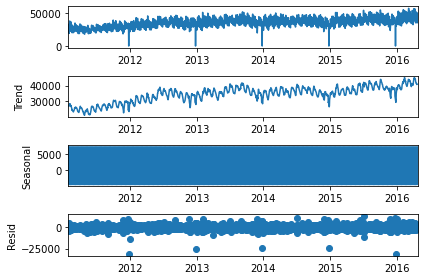

In [68]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(sales_sum, model='additive')
result.plot()
plt.show()

What we see:

+ 第一张图就是真正的时间序列图
+ 第二张图显示了这一趋势。总的趋势似乎在逐年增加
+ 第三张图表明有较强的周期季节性
+ 最后一张表明有较强的噪声。

## 查看州的月度销售时间序列

In [69]:
state_level = sales_data.groupby("state_id")[date_col].sum().reset_index().set_index('state_id').T
state_level['datum'] = [base + datetime.timedelta(days=x) for x in range(1913)]
state_level.set_index('datum', drop=True, inplace=True)
state_level.sort_index(inplace=True)
state_level.head()

state_id,CA,TX,WI
datum,,,
2011-01-29,14195,9438,8998
2011-01-30,13805,9630,8314
2011-01-31,10108,6778,6897
2011-02-01,11047,7381,6984
2011-02-02,9925,5912,3309


In [70]:
state_month_level = state_level.groupby(pd.Grouper(freq='1M')).sum()
state_month_level.iplot(title = "Monthly Sales accross States")

我们看到的：
+ CA州的销售额一直是最高的。与其他州相比，CA州8月份的高峰最为明显。季节性对CA州销售的影响最大
+ WI州的销售额增长率是历年来最高的。2013年之前，WI州的销售额低于TX州。2013年至2015年8月，TX州和WI州的销售额相似。2015年8月之后，它的销售额高于TX州。看看是什么导致WI在过去几年中大幅增长。

各州的销售时间序列分解

In [71]:
from statsmodels.tsa.seasonal import seasonal_decompose
res1 = seasonal_decompose(state_month_level["CA"], model='additive')
res2 = seasonal_decompose(state_month_level["TX"], model='additive')
res3 = seasonal_decompose(state_month_level["WI"], model='additive')

In [72]:
def plotseasonal(res, axes ):
    res.observed.plot(ax=axes[0], legend=False)
    axes[0].set_ylabel('Observed')
    res.trend.plot(ax=axes[1], legend=False)
    axes[1].set_ylabel('Trend')
    res.seasonal.plot(ax=axes[2], legend=False)
    axes[2].set_ylabel('Seasonal')
    res.resid.plot(ax=axes[3], legend=False)
    axes[3].set_ylabel('Residual')

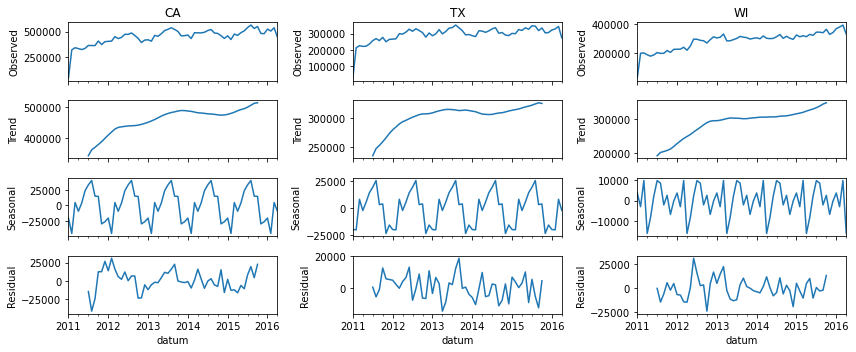

In [73]:
import warnings
import matplotlib
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

fig, axes = plt.subplots(ncols=3, nrows=4, sharex=True, figsize=(12,5))

plotseasonal(res1, axes[:,0])
axes[0,0].set_title("CA")
plotseasonal(res2, axes[:,1])
axes[0,1].set_title("TX")
plotseasonal(res3, axes[:,2])
axes[0,2].set_title("WI")
plt.tight_layout()
plt.show()

+ CA和WI呈逐渐增加的趋势，TX增长较快，然后有点停滞
+ CA州和TX州在7月、8月和12月、1月出现了类似的季节性高峰
+ WI州显示出不同的季节性，3月见顶，4月见底，8月见顶

In [74]:
store_level = sales_data.groupby("store_id")[date_col].sum().reset_index().set_index('store_id').T
store_level['datum'] = [base + datetime.timedelta(days=x) for x in range(1913)]
store_level.set_index('datum', drop=True, inplace=True)
store_level.sort_index(inplace=True)
store_level.head()

store_id,CA_1,CA_2,CA_3,CA_4,TX_1,TX_2,TX_3,WI_1,WI_2,WI_3
datum,,,,,,,,,,
2011-01-29,4337,3494,4739,1625,2556,3852,3030,2704,2256,4038
2011-01-30,4155,3046,4827,1777,2687,3937,3006,2194,1922,4198
2011-01-31,2816,2121,3785,1386,1822,2731,2225,1562,2018,3317
2011-02-01,3051,2324,4232,1440,2258,2954,2169,1251,2522,3211
2011-02-02,2630,1942,3817,1536,1694,2492,1726,2,1175,2132


In [75]:
# 关于pd.Grouper()操作示例可看：https://segmentfault.com/a/1190000012394176?utm_source=tag-newest
# 对于其理解：https://github.com/pandas-dev/pandas/blob/v1.0.3/pandas/core/groupby/grouper.py#L35-L215
store_month_level = store_level.groupby(pd.Grouper(freq='1M')).sum() # 按一个月进行求和
store_month_level.head()

store_id,CA_1,CA_2,CA_3,CA_4,TX_1,TX_2,TX_3,WI_1,WI_2,WI_3
datum,,,,,,,,,,
2011-01-31,11308,8661,13351,4788,7065,10520,8261,6460,6196,11553
2011-02-28,89434,67686,119792,41189,62534,84900,64581,46592,51708,97959
2011-03-31,93468,73964,127344,44902,66890,89902,68370,49747,51113,97867
2011-04-30,91553,72803,122428,44220,66435,87683,66563,46898,47651,91479
2011-05-31,87988,68305,120711,44562,67920,86128,67572,45269,45487,85620


### 不同门店的月度销售时间序列


In [76]:
cf.Figure(cf.subplots(
    [store_month_level[['CA_1','CA_2','CA_3','CA_4']].figure(),
     store_month_level[['TX_1','TX_2','TX_3']].figure(),
     store_month_level[['WI_1','WI_2','WI_3']].figure()],
    shape=(1,3),
    subplot_titles=('CA', 'TX', 'WI'))).iplot()

What we see:

+ CA系列总体趋势都是上涨的。其中，CA_1和CA_3表现出明显的季节性。CA_2在2015年大幅降低，但在2016年达到顶峰。CA_4也有类似的增长趋势。
+ 在TX中，TX_2在2014年之前表现的不错，但在2014年后急剧下降。TX_1显示出微微的增长趋势，而不错的是TX_3一直呈现出增长趋势。
+ 在WI中，WI_1和WI_2销售额大幅拉升，在2012、13年的销售额从50K增长到100K。WI_3在2012年业绩大幅拉升后，后两年就下降了很多，但在2016年有所增长。

### 绘制categories的销售时间序列

In [77]:
cat_level = sales_data.groupby('cat_id')[date_col].sum().reset_index().set_index("cat_id").T
cat_level['datum'] = [base + datetime.timedelta(days=x) for x in range(1913)]

In [78]:
cat_level.set_index('datum',drop=True,inplace=True)
cat_level.sort_index(inplace=True)

In [79]:
cat_level.head()

cat_id,FOODS,HOBBIES,HOUSEHOLD
datum,,,
2011-01-29,23178,3764,5689
2011-01-30,22758,3357,5634
2011-01-31,17174,2682,3927
2011-02-01,18878,2669,3865
2011-02-02,14603,1814,2729


In [80]:
cat_level_level = cat_level.groupby(pd.Grouper(freq='1M')).sum()

In [81]:
cat_level_level.iplot(title = "Monthly Sales accross Categories")

+ Foods销售额一直远高于household和hobbies
+ Hobbies表现出一种非常浅平缓增长趋势和不受季节性影响。
+ Foods明显受季节性影响，household可以明显看出逐年增长趋势。

对每个categories的时间序列进行拆解，更加精细了解销售情况。

In [82]:
#Plotting the sales time series decomposition for each state
res1 = seasonal_decompose(cat_level_level["FOODS"], model='additive')
res2 = seasonal_decompose(cat_level_level["HOBBIES"], model='additive')
res3 = seasonal_decompose(cat_level_level["HOUSEHOLD"], model='additive')

In [83]:
def plotseasonal(res, axes ):
    res.observed.plot(ax=axes[0], legend=False)
    axes[0].set_ylabel('Observed')
    res.trend.plot(ax=axes[1], legend=False)
    axes[1].set_ylabel('Trend')
    res.seasonal.plot(ax=axes[2], legend=False)
    axes[2].set_ylabel('Seasonal')
    res.resid.plot(ax=axes[3], legend=False)
    axes[3].set_ylabel('Residual')

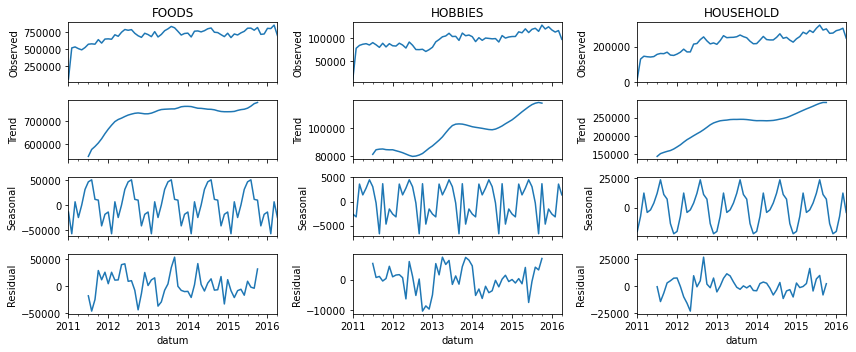

In [84]:
fig, axes = plt.subplots(ncols=3, nrows=4, sharex=True, figsize=(12,5))
plotseasonal(res1, axes[:,0])
axes[0,0].set_title("FOODS")
plotseasonal(res2, axes[:,1])
axes[0,1].set_title("HOBBIES")
plotseasonal(res3, axes[:,2])
axes[0,2].set_title("HOUSEHOLD")
plt.tight_layout()
plt.show()

+ FOODS销售额在2012年前快速增长，2012年到2016年增长停滞。其中每年3月份会出现一个小增长，在8月份出现一个大增长。
+ 从2012年8月到2013年8月，2014年8月到2015年8月，HOBBIES销售额呈现隔年增长。在接下来的两年里，年销售额一直处于停止状态。其中3月份的峰值最为明显。
+ HOUSEHOLDS销售额呈现出明显的增长趋势，且在3月和8月呈现出明显的季节性周期。

### 绘制跨部门的月度销售额

In [86]:
dep_level = sales_data.groupby('dept_id')[date_col].sum().reset_index().set_index("dept_id")
dep_level

,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,d_10,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
dept_id,,,,,,,,,,,,,,,,,,,,,
FOODS_1,2343,2216,1657,1508,1209,1897,1903,2235,1925,1586,...,3192,3523,3062,2461,2544,2657,2639,3169,3712,3185
FOODS_2,4094,4209,3174,3606,2869,4375,3349,4384,4273,3684,...,5661,5792,6588,5247,4942,4734,4446,4974,5524,6473
FOODS_3,16741,16333,12343,13764,10525,15821,15238,21132,18664,13631,...,19829,22692,24847,18443,17462,16241,16232,18561,22691,22996
HOBBIES_1,3610,3172,2497,2531,1714,3133,2855,3831,2741,2514,...,3367,4220,4325,3038,3420,3141,3014,3678,4397,4226
HOBBIES_2,154,185,185,138,100,87,89,155,158,101,...,419,414,495,285,367,331,339,407,390,457
HOUSEHOLD_1,4105,3858,2827,2732,1802,2664,3161,4334,3494,2857,...,7375,9253,9720,6776,6986,6393,6580,7762,9545,9795
HOUSEHOLD_2,1584,1776,1100,1133,927,1234,1415,1861,1481,1199,...,1946,2468,2603,1809,1849,1846,1783,1966,2703,2663


In [89]:
dep_level = dep_level.T
dep_level['datum'] = [base + datetime.timedelta(days=x) for x in range(1913)]

In [90]:
dep_level.set_index('datum',drop=True,inplace=True)
dep_level.sort_index(inplace=True)
dep_level.head()

dept_id,FOODS_1,FOODS_2,FOODS_3,HOBBIES_1,HOBBIES_2,HOUSEHOLD_1,HOUSEHOLD_2
datum,,,,,,,
2011-01-29,2343,4094,16741,3610,154,4105,1584
2011-01-30,2216,4209,16333,3172,185,3858,1776
2011-01-31,1657,3174,12343,2497,185,2827,1100
2011-02-01,1508,3606,13764,2531,138,2732,1133
2011-02-02,1209,2869,10525,1714,100,1802,927


In [92]:
dep_level_level = dep_level.groupby(pd.Grouper(freq='1M')).sum()

In [93]:
cf.Figure(cf.subplots([dep_level_level[['FOODS_1','FOODS_2','FOODS_3']].figure(),
                       dep_level_level[['HOBBIES_1','HOBBIES_2']].figure(),
                      dep_level_level[['HOUSEHOLD_1','HOUSEHOLD_2']].figure()],
                     shape=(1,3),
                      subplot_titles=('FOODS','HOBBIES','HOUSEHOLD'))).iplot()

+ 在FOODS中，FOODS_3的销售额最高，但当季来回波动的季节性很高，从500K到600K。FOODS_2在这若干年内有所增长，而FOODS_1在过去几年中几乎停止不前。
+ HOUSEHOLD_1销售额相对于其他部门而言，涨幅表现最佳。
+ 在HOBBIES中，HOBBIES_1销售额变动较大，但总体呈现上证趋势。

In [94]:
dept_cat_level = sales_data.groupby(['state_id','cat_id']
                                   )[date_col].sum().reset_index().set_index(
    ["state_id","cat_id"]).T

In [95]:
dept_cat_level['datum'] = [base+datetime.timedelta(days=x) for x in range(1913)]

In [97]:
dept_cat_level.set_index('datum',drop=True,inplace=True)

In [98]:
dept_cat_level.sort_index(inplace=True)

In [99]:
dept_cat_level.head()

state_id       CA                      TX                      WI          \
cat_id      FOODS HOBBIES HOUSEHOLD FOODS HOBBIES HOUSEHOLD FOODS HOBBIES   
datum                                                                       
2011-01-29  10101    1802      2292  6853     879      1706  6224    1083   
2011-01-30   9862    1561      2382  7030     870      1730  5866     926   
2011-01-31   6944    1472      1692  5124     526      1128  5106     684   
2011-02-01   7864    1405      1778  5470     809      1102  5544     455   
2011-02-02   7178    1181      1566  4602     501       809  2823     132   

state_id              
cat_id     HOUSEHOLD  
datum                 
2011-01-29      1691  
2011-01-30      1522  
2011-01-31      1107  
2011-02-01       985  
2011-02-02       354

In [100]:
dept_cat_level.columns = [f'{i}_{j}' if j != '' else f'{i}' for i,j in dept_cat_level.columns ]

In [101]:
dept_cat_monthly_level = dept_cat_level.groupby(pd.Grouper(freq='1M')).sum()

In [102]:
cf.Figure(
    cf.subplots(
        [dept_cat_monthly_level[['CA_FOODS','TX_FOODS','WI_FOODS']].figure(),
         dept_cat_monthly_level[['CA_HOBBIES','TX_HOBBIES','WI_HOBBIES']].figure(),
         dept_cat_monthly_level[['CA_HOUSEHOLD','TX_HOUSEHOLD','WI_HOUSEHOLD']].figure()],
        shape=(1,3),
        subplot_titles = ('FOODS','HOBBIES','HOUSEHOLD'))).iplot()

+ 尽管CA的FOODS销售量在每年的8月出现季节性高峰，并在年末和年初(11,12,1,2)有所下降，但这些年涨幅都非常小。
+ TX的FOODS销售量在每年8月出现季节性高峰，在1,2月份有所下降，但从2013年往后销售量有稍微下降。
+ WI的FOODS销售量无季节性变化，在2012和2015年销售量增幅明显。且在2015年WI的销售额超越了TX，使得总体WI的销售额超越了TX。
+ CA的HOBBIES销售量增幅明显，WI和TX销售量上涨走势较为相似。
+ CA的HOUSEHOLD销售量涨幅明显，
+ HOBBIES总体上不受季节性影响。
+ HOUSEHOLD项目在三个州中都呈现出明显的上涨趋势。
+ CA显示了在这些年中HOUSEHOLD销售量增长最佳，并且每月的季节性在8月达到高峰，在12月和1月下降
+ TX和WI涨幅趋势相近，但TX的销售量是稍微优于WI州的。且在7、8月份都是增长的，但不能说明有季节性。在2013年3月份两者都有一个明显增长尖峰。

## 4.2 周销售量

### 绘制周销售量图

In [105]:
pd.__version__

'1.0.1'

In [106]:
sales_sum

,sales
datum,
2011-01-29,32631
2011-01-30,31749
2011-01-31,23783
2011-02-01,25412
2011-02-02,19146
...,...
2016-04-20,35343
2016-04-21,35033
2016-04-22,40517


In [136]:
map_days = {0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',
        4:'Friday',5:'Saturday',6: 'Sunday'}
sales_sum['weekday'] = sales_sum.index.map(lambda x:x.weekday())

In [137]:
sales_sum['weekday'] = sales_sum['weekday'].map(map_days)

In [138]:
print(sales_sum.index[0]) # 2001年1月29号星期六
print(sales_sum.index[0].weekday())
print(sales_sum['weekday'].unique())

2011-01-29 00:00:00
5
['Saturday' 'Sunday' 'Monday' 'Tuesday' 'Wednesday' 'Thursday' 'Friday']


In [139]:
days = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday']
# reindex(days) 重新排序把
sales_sum_weekday = sales_sum.groupby(sales_sum.weekday).mean().reindex(days)

In [140]:
sales_sum_weekday

,sales
weekday,
Monday,32852.967033
Tuesday,30368.780220
Wednesday,30010.021978
Thursday,30205.007326
Friday,34225.985348
Saturday,41546.894161
Sunday,41130.021898


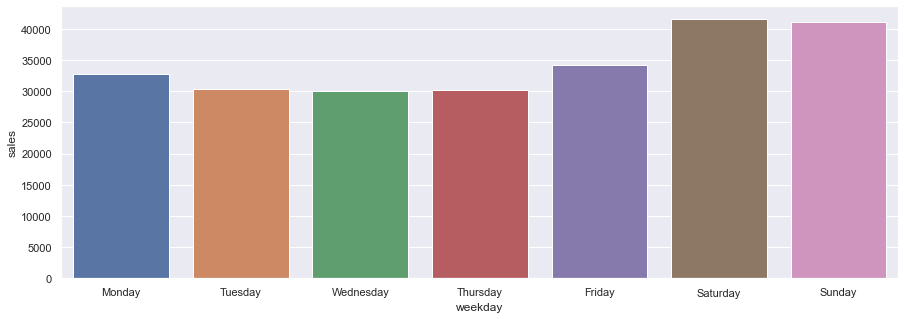

In [141]:
sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(x = sales_sum_weekday.index,y = 'sales',data = sales_sum_weekday)

星期六的整体销售额最高，可能是因为周末的第一天，人们争相购买日用品，其次是星期天也是周末。

### 绘制3种产品类的周销售图

In [142]:
cat_level = sales_data.groupby("cat_id")[date_col].sum().reset_index().set_index('cat_id').T

In [143]:
cat_level['datum'] = [base + datetime.timedelta(days=x) for x in range(1913)]

In [144]:
cat_level.set_index('datum', drop=True, inplace=True)

In [145]:
cat_level.sort_index(inplace=True)

In [146]:
cat_level.head()

cat_id,FOODS,HOBBIES,HOUSEHOLD
datum,,,
2011-01-29,23178,3764,5689
2011-01-30,22758,3357,5634
2011-01-31,17174,2682,3927
2011-02-01,18878,2669,3865
2011-02-02,14603,1814,2729


In [150]:
cat_level['weekday'] = cat_level.index.map(lambda x :x.weekday())
cat_level['weekday'] = cat_level['weekday'].map(map_days)

In [152]:
sales_cat_weekday = cat_level.groupby('weekday').mean().reindex(days)
sales_cat_weekday.iplot(kind='bar',title='Avg. Sales arocc day of week')

what we see:
+ Sunday和Saturday是FOODS销售的最佳时间段。
+ 就HOBBIES和HOUSEHOLD而言，Saturday的销售量比Sunday高那么点。
+ 从中可以看出一种周季节性的感觉，Saturday和Sunday的销售量最高，Wednesday和Thursday的销售量最低。

## 4.3 月销售量

### 绘制月销售量

In [153]:
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul','Aug', 'Sep', 'Oct', 'Nov', 'Dec'] 
monthly_sales = sales_sum.groupby(sales_sum.index.strftime('%b')).mean().reindex(months)

In [154]:
monthly_sales.iplot( kind="bar",title = "Avg. Sales across months")

8月份是一年中销售量最高的(将近售出36k)

### 绘制三种类别产品的月销售图

In [155]:
cat_level = sales_data.groupby("cat_id")[date_col].sum().reset_index().set_index('cat_id').T
cat_level['datum'] = [base + datetime.timedelta(days=x) for x in range(1913)]

In [156]:
cat_level.set_index('datum', drop=True, inplace=True)
cat_level.sort_index(inplace=True)
cat_level.head()

cat_id,FOODS,HOBBIES,HOUSEHOLD
datum,,,
2011-01-29,23178,3764,5689
2011-01-30,22758,3357,5634
2011-01-31,17174,2682,3927
2011-02-01,18878,2669,3865
2011-02-02,14603,1814,2729


In [157]:
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul','Aug', 'Sep', 'Oct', 'Nov', 'Dec'] 
monthly_sales = cat_level.groupby(cat_level.index.strftime('%b')).mean().reindex(months)
monthly_sales.iplot( kind="bar",title = "Avg. Sales across months")

+ 8月份的FOODS销量最高，可能是因为节假日或其他气候条件，如高温和高降水
+ 8月份的HOUSEHOLD销量也最高
+ 四月和六月的HOBBIES销售量最高，但总体而言月销售量非常稳定

绘制月每天的销售量热力图

In [159]:
monthly_sales = sales_sum.groupby(cat_level.index.strftime('%d')).mean()

In [160]:
sales_list = np.array(monthly_sales.values.tolist())
sales_list = np.append(sales_list,np.repeat(np.nan,4)).reshape(5,7)

In [161]:
labels = range(1,32)
labels = np.append(labels,np.repeat(np.nan,4)).reshape(5,7)

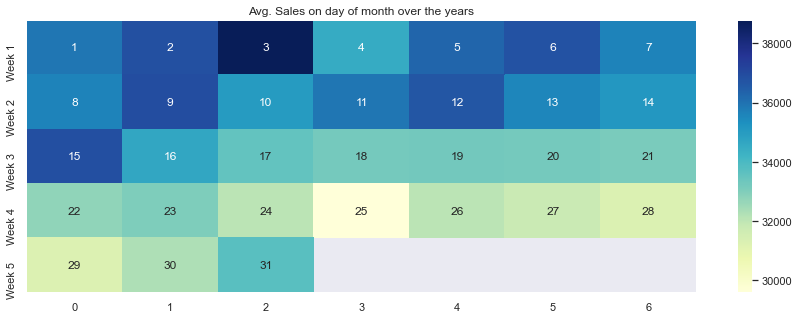

In [163]:
heat_map = sns.heatmap(sales_list,cmap = 'YlGnBu',annot = labels,
                       yticklabels=("Week 1","Week 2","Week 3","Week 4","Week 5"))
plt.title("Avg. Sales on day of month over the years")
plt.show()

每个月的第一二周销售量最高，难道是因为月末工资？？？

绘制3中产品的月销售图

In [164]:
cat_monthly_sales = cat_level.groupby(cat_level.index.strftime('%d')).mean()

In [165]:
foods_list = np.array(cat_monthly_sales['FOODS'].tolist())
foods_list = np.append(foods_list, np.repeat(np.nan, 4)).reshape(5,7)
hobbies_list = np.array(cat_monthly_sales['HOBBIES'].tolist())
hobbies_list = np.append(hobbies_list, np.repeat(np.nan, 4)).reshape(5,7)
household_list = np.array(cat_monthly_sales['HOUSEHOLD'].tolist())
household_list = np.append(household_list, np.repeat(np.nan, 4)).reshape(5,7)

In [166]:
labels = range(1,32)
labels = np.append(labels, np.repeat(np.nan, 4)).reshape(5,7)

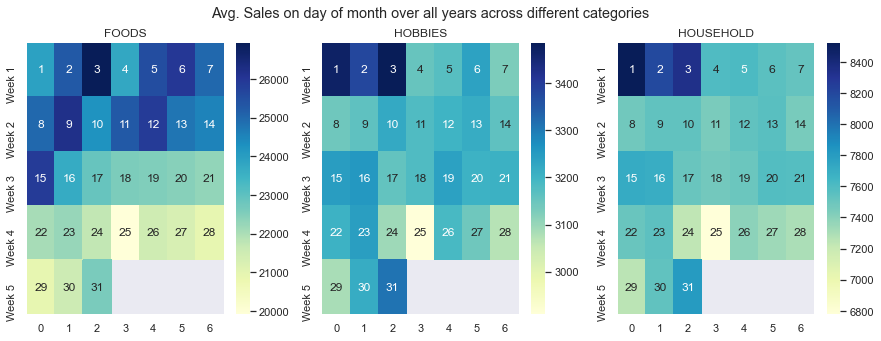

In [167]:
fig, (ax1, ax2 , ax3) = plt.subplots(1,3)
foods_map= sns.heatmap(foods_list,cmap = "YlGnBu",annot = labels, yticklabels = ("Week 1","Week 2","Week 3","Week 4","Week 5"), ax =ax1)
hobbies_map= sns.heatmap(hobbies_list,cmap = "YlGnBu",annot = labels, yticklabels = ("Week 1","Week 2","Week 3","Week 4","Week 5"), ax =ax2)
household_map= sns.heatmap(household_list,cmap = "YlGnBu",annot = labels, yticklabels = ("Week 1","Week 2","Week 3","Week 4","Week 5"), ax =ax3)
ax1.set_title('FOODS')
ax2.set_title('HOBBIES')
ax3.set_title('HOUSEHOLD')
plt.suptitle("Avg. Sales on day of month over all years across different categories ")
plt.show()

+ 从中可以看出，食品销售额在每个月的第一二个星期销售量最高
+ HOBBIES和HOUSEHOLD在每月的前三天销售量最高，从中可以看出家庭屯货都是以月为单位的？

### 探究Events和SNAP活动都销售的影响

In [171]:
# 将sales_sum中的weekday删除
sales_sum.drop(columns='weekday',inplace=True)

In [172]:
# 将calendar data和sales data合并，探究calendar data对销售量的影响
calender_data['date'] = pd.to_datetime(calender_data['date'])
overall_sales_special = pd.merge(calender_data,sales_sum,left_on='date',
                                right_on='datum',how='right')

In [173]:
overall_sales_special.head()

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI,sales
0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0,32631
1,2011-01-30,11101,Sunday,2,1,2011,d_2,NaN,NaN,NaN,NaN,0,0,0,31749
2,2011-01-31,11101,Monday,3,1,2011,d_3,NaN,NaN,NaN,NaN,0,0,0,23783
3,2011-02-01,11101,Tuesday,4,2,2011,d_4,NaN,NaN,NaN,NaN,1,1,0,25412
4,2011-02-02,11101,Wednesday,5,2,2011,d_5,NaN,NaN,NaN,NaN,1,0,1,19146


In [174]:
overall_sales_special.shape

(1913, 15)

### 衡量events的影响

In [176]:
# 绘制2012年的日销售额，以了解event的影响规律
overall_sales_special[overall_sales_special.year == 2012].groupby("date")["sales"].sum().iplot(title = "Daily Overall Sales")

In [177]:
print("Event days in 2012")
overall_sales_special[(overall_sales_special.year == 2012) & ((overall_sales_special.event_name_1.notnull()) | (overall_sales_special.event_name_2.notnull()))]

Event days in 2012


,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI,sales
337,2012-01-01,11149,Sunday,2,1,2012,d_338,NewYear,National,NaN,NaN,1,1,0,21807
343,2012-01-07,11150,Saturday,1,1,2012,d_344,OrthodoxChristmas,Religious,NaN,NaN,1,1,0,37143
352,2012-01-16,11151,Monday,3,1,2012,d_353,MartinLutherKingDay,National,NaN,NaN,0,0,0,30548
372,2012-02-05,11202,Sunday,2,2,2012,d_373,SuperBowl,Sporting,NaN,NaN,1,1,1,40075
381,2012-02-14,11203,Tuesday,4,2,2012,d_382,ValentinesDay,Cultural,NaN,NaN,0,0,1,25100
387,2012-02-20,11204,Monday,3,2,2012,d_388,PresidentsDay,National,NaN,NaN,0,0,0,30218
389,2012-02-22,11204,Wednesday,5,2,2012,d_390,LentStart,Religious,NaN,NaN,0,0,0,24115
396,2012-02-29,11205,Wednesday,5,2,2012,d_397,LentWeek2,Religious,NaN,NaN,0,0,0,24802
404,2012-03-08,11206,Thursday,6,3,2012,d_405,Purim End,Religious,NaN,NaN,1,0,1,29759
413,2012-03-17,11208,Saturday,1,3,2012,d_414,StPatricksDay,Cultural,NaN,NaN,0,0,0,37904


如果我们仔细观察2012年的销售额，我们会发现人们更喜欢在活动前的周末（最好是周六）购买，而不是在活动当天购买。所以我们看不到活动当天的销售量增加。但之前周末销量的增长，可以归因于这一事件。我们看到一些例外，尽管像劳动节是星期一，我们仍然看到一个高峰在那一天。另一个是感恩节，是在星期四，但我们看到一个高峰在前一天是星期三

In [178]:
# 对event发生前的上一个周末进行标记，用于后面探索分析
event_days_sales = overall_sales_special[
    ((overall_sales_special.event_name_1.notnull()) | 
     (overall_sales_special.event_name_2.notnull()))
]
overall_sales_special["weekend_precede_event"] = np.nan

def update_weekend_precede_event(week_e,wday,e1,e2):
    e2 = '_' + e2 if type(e2) == str else ''
    drift = e1 + e2
    if wday == 1:
        overall_sales_special.loc[(overall_sales_special['wm_yr_wk']==week_e)&
                                  (overall_sales_special['wday']==1),
                                  "weekend_precede_event"] = drift
    else:
        overall_sales_special.loc[(overall_sales_special['wm_yr_wk']==week_e)&
                                  ((overall_sales_special['wday']==1)|(overall_sales_special['wday']==2)),
                                  "weekend_precede_event"] = drift
_ = event_days_sales.apply(
    lambda row : update_weekend_precede_event(row['wm_yr_wk'],row['wday'],
                                              row['event_name_1'], 
                                              row['event_name_2']),
    axis = 1)


In [179]:
overall_sales_special.head(10)

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI,sales,weekend_precede_event
0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0,32631,NaN
1,2011-01-30,11101,Sunday,2,1,2011,d_2,NaN,NaN,NaN,NaN,0,0,0,31749,NaN
2,2011-01-31,11101,Monday,3,1,2011,d_3,NaN,NaN,NaN,NaN,0,0,0,23783,NaN
3,2011-02-01,11101,Tuesday,4,2,2011,d_4,NaN,NaN,NaN,NaN,1,1,0,25412,NaN
4,2011-02-02,11101,Wednesday,5,2,2011,d_5,NaN,NaN,NaN,NaN,1,0,1,19146,NaN
5,2011-02-03,11101,Thursday,6,2,2011,d_6,NaN,NaN,NaN,NaN,1,1,1,29211,NaN
6,2011-02-04,11101,Friday,7,2,2011,d_7,NaN,NaN,NaN,NaN,1,0,0,28010,NaN
7,2011-02-05,11102,Saturday,1,2,2011,d_8,NaN,NaN,NaN,NaN,1,1,1,37932,SuperBowl
8,2011-02-06,11102,Sunday,2,2,2011,d_9,SuperBowl,Sporting,NaN,NaN,1,1,1,32736,SuperBowl
9,2011-02-07,11102,Monday,3,2,2011,d_10,NaN,NaN,NaN,NaN,1,1,0,25572,NaN


我们可以看到Super Bowel event发生在周日，我们已经通过weekend_de_event列将其映射到前一个周六和周日

首先让我们看看不同类型的事件的影响，然后我们再看看特定的事件

In [180]:
# 添加event列
events.columns = ["weekend_precede_event_type","weekend_precede_event"]
overall_sales_special = pd.merge(overall_sales_special,events,how= "left",
                                 on="weekend_precede_event")

In [182]:
# 在不同活动类型之前绘制周末销售图

In [185]:
# 计算event发生前一周对销售量的影响
event_type_impact = overall_sales_special.groupby(['weekend_precede_event_type'])['sales'].mean().reset_index()
event_type_impact = event_type_impact.sort_values("sales",ascending = False)
event_type_impact.columns = ["event_type","avg_sales_preceding_weekend"]

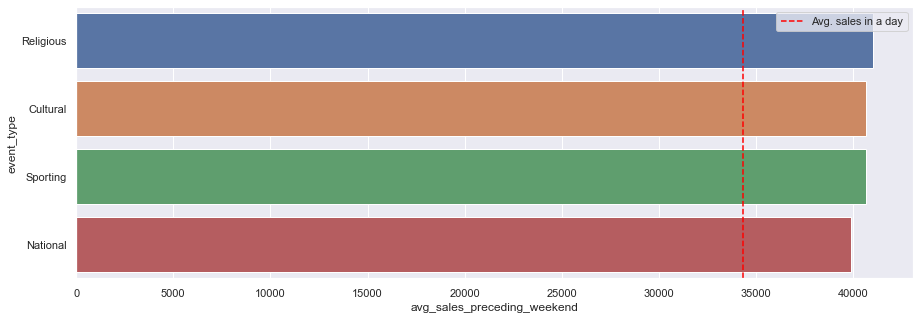

In [186]:
# 绘制柱状图
# avg. sales on the weekend days before the event to see the impact
chart = sns.barplot(y= "event_type", x='avg_sales_preceding_weekend', data=event_type_impact)
chart.axvline(sales_sum.sales.mean(),label = "Avg. sales in a day",c='red', linestyle='dashed')
plt.legend()

+ 所有活动类型之前的周末的销售额都远高于每天的平均销售额
+ Religious活动对上周末的销售影响最大
+ National活动对上周末销售的影响最小


### 在每次活动之前绘制周末销售图

In [196]:
# 计算event的前一个周末对销售的影响
event_impact = overall_sales_special.groupby(['weekend_precede_event'])['sales'].mean().reset_index()
event_impact = event_impact.sort_values("sales",ascending = False)
event_impact.columns = ["events","avg_sales_preceding_weekend"]

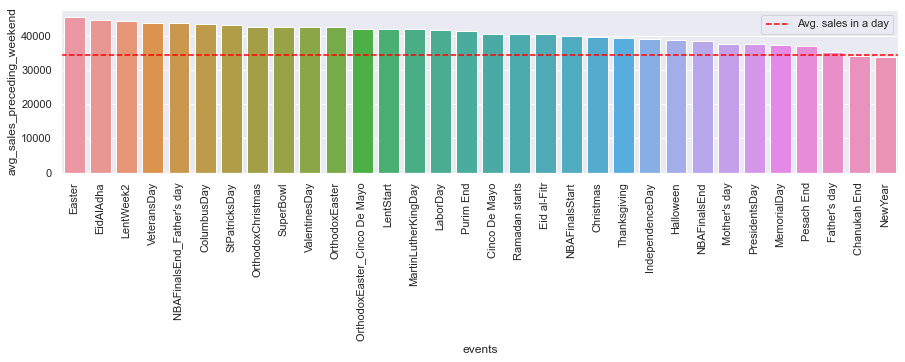

In [188]:
# 绘制条形图，查看event前一个周末对销售量的影响
sns.set(rc={'figure.figsize':(15,3)})
chart = sns.barplot(x= "events", y='avg_sales_preceding_weekend', data=event_impact)
# 添加平均销售量
chart.axhline(sales_sum.sales.mean(),label = "Avg. sales in a day",c='red', linestyle='dashed')
var = chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.legend()

+ 几乎所有周末的销售额都高于平均水平。所以event确实会影响销售
+ 销售额最高的是复活节前的周末，预计每天约44k，其次是艾达拉达，这两个都是宗教活动（以下是我们发现的影响最大的宗教活动类型）。附注：既然宗教类型对销售有影响，是否应该探究一下宗教活动所需物品和进行相关促销活动？
+ 最低的销售量是在新年前的周末

### SNAP days对销售量的影响

各州有不同的SANP dates，从而分开探讨

In [190]:
# 表拼接
overall_sales_special = pd.merge(overall_sales_special,
                                 state_level.reset_index(),
                                 how = "left",left_on="date",right_on="datum")
overall_sales_special.drop("datum",axis = 1,inplace =True)

In [191]:
overall_sales_special.head()

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI,sales,weekend_precede_event,weekend_precede_event_type,CA,TX,WI
0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0,32631,NaN,NaN,14195,9438,8998
1,2011-01-30,11101,Sunday,2,1,2011,d_2,NaN,NaN,NaN,NaN,0,0,0,31749,NaN,NaN,13805,9630,8314
2,2011-01-31,11101,Monday,3,1,2011,d_3,NaN,NaN,NaN,NaN,0,0,0,23783,NaN,NaN,10108,6778,6897
3,2011-02-01,11101,Tuesday,4,2,2011,d_4,NaN,NaN,NaN,NaN,1,1,0,25412,NaN,NaN,11047,7381,6984
4,2011-02-02,11101,Wednesday,5,2,2011,d_5,NaN,NaN,NaN,NaN,1,0,1,19146,NaN,NaN,9925,5912,3309


In [192]:
# 比较3个州的有和无SNAP的天数
ca_snap = overall_sales_special.groupby("snap_CA")["CA"].mean().reset_index()
tx_snap = overall_sales_special.groupby("snap_TX")["TX"].mean().reset_index()
wi_snap = overall_sales_special.groupby("snap_WI")["WI"].mean().reset_index()

In [193]:
ca_snap.columns = ["Snap","CA"]
tx_snap.columns = ["Snap","TX"]
wi_snap.columns = ["Snap","WI"]

In [194]:
snap_impact = pd.merge(ca_snap,tx_snap,on = "Snap")
snap_impact = pd.merge(snap_impact,wi_snap,on = "Snap")
snap_impact = pd.melt(snap_impact, id_vars=['Snap'], 
                      value_vars=['CA','TX','WI'],
                      var_name='State', value_name='Avg Sales')

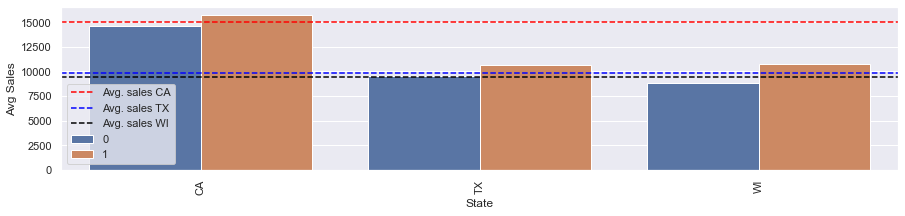

In [195]:
# 绘制条形图查看销售情况
chart=sns.barplot(x= "State", y='Avg Sales',hue = 'Snap' ,data=snap_impact)
sns.set(rc={'figure.figsize':(5,5)})
chart.axhline(overall_sales_special.CA.mean(),
              label = "Avg. sales CA",c='red', 
              linestyle='dashed')
chart.axhline(overall_sales_special.TX.mean(),
              label = "Avg. sales TX",c='blue', 
              linestyle='dashed')
chart.axhline(overall_sales_special.WI.mean(),
              label = "Avg. sales WI",c='black', 
              linestyle='dashed')
var = chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.legend()

所有的州在SNAP days都有更高的销售额。我们可以看到最大的WI增长。